<a href="https://colab.research.google.com/github/calebarr/AIS/blob/merging_data/Merging_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Merging Data Visulization

# Mount Google Drive
from google.colab import drive
import os
from datetime import datetime, timedelta
import requests
import pandas as pd
import zipfile

print("Mounting Google Drive...")
drive.mount('/content/drive')


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# "/content/drive/My Drive/SIADS_593/assets/"

yfinance_data = "/content/drive/My Drive/SIADS_593/assets/merging/yfinance_data.csv"
yahoo_fin_data = pd.read_csv(yfinance_data)


ais_port_data = "/content/drive/My Drive/SIADS_593/assets/merging/ais_port_visits.csv"
vessel_data = pd.read_csv(ais_port_data)

y_micro_data= "/content/drive/My Drive/SIADS_593/assets/merging/yfinance_macro_data.csv"
micro_data = pd.read_csv(y_micro_data)

<ipython-input-3-295664467>:4: DtypeWarning: Columns (202) have mixed types. Specify dtype option on import or set low_memory=False.
  yahoo_fin_data = pd.read_csv(yfinance_data)


In [4]:
vessel_data.head()

,MMSI,BaseDateTime,LAT,LON,VesselType,Status,TransceiverClass,Port_Name
0,205700000,2020-01-01 00:01:05,33.74967,-118.20893,70.0,5.0,A,Los Angeles
1,205706000,2020-01-01 00:01:07,28.93657,-95.33370,80.0,5.0,A,Houston
2,209513000,2020-01-01 00:00:48,26.08783,-80.11618,70.0,5.0,A,Miami
3,210737000,2020-01-01 00:01:47,30.06448,-90.87478,70.0,5.0,A,New Orleans
4,210998000,2020-01-01 00:01:31,29.74722,-95.11249,70.0,5.0,A,Houston


In [5]:
yahoo_fin_data.head()

,Ticker,Period,Price,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,...,Amortization Of Intangibles,Depreciation,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,^GSPC_Close
0,A,2020-01-02,82.885246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999,3257.850098
1,NDAQ,2020-01-02,33.325825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Nasdaq, Inc.",Financials,Financial Exchanges & Data,"New York City, New York",2008-10-22,1120193,1971,3257.850098
2,NCLH,2020-01-02,58.830002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Norwegian Cruise Line Holdings,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",2017-10-13,1513761,2011 (1966),3257.850098
3,MU,2020-01-02,54.150459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Micron Technology,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125,1978,3257.850098
4,MTD,2020-01-02,805.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mettler Toledo,Health Care,Life Sciences Tools & Services,"Columbus, Ohio",2016-09-06,1037646,1945,3257.850098


In [6]:

pip install "vl-convert-python>=1.6.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 49.7 MB/s eta 0:00:00


In [14]:
import pandas as pd
import altair as alt

# Make sure date is in datetime format
yahoo_fin_data['Period'] = pd.to_datetime(yahoo_fin_data['Period'])

# Downsample to every 5th row
subset = yahoo_fin_data.iloc[::5, :]

# Plot the time series chart
chart = alt.Chart(subset).mark_line().encode(
    x='Period:T',
    y='^GSPC_Close:Q',
    tooltip=['Period:T', '^GSPC_Close:Q']
).properties(
    title='S&P 500 Close Prices Over Time (Downsampled)'
).interactive()

chart



alt.Chart(...)

In [61]:
yahoo_fin_data.columns

Index(['Ticker', 'Period', 'Price', 'Tax Effect Of Unusual Items',
       'Tax Rate For Calcs', 'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation',
       ...
       'Amortization Of Intangibles', 'Depreciation', 'Security',
       'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location',
       'Date added', 'CIK', 'Founded', '^GSPC_Close'],
      dtype='object', length=219)

In [71]:
import pandas as pd

# Make sure merged_df['Date'] is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Monthly aggregation
merged_df['Month'] = merged_df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_avg = merged_df.groupby('Month').agg({
    'Vessel_Count': 'sum',
    '^GSPC_Close': 'mean'
}).reset_index()

# Create lagged versions of Vessel_Count
for lag in range(1, 7):
    monthly_avg[f'Vessel_Count_Lag_{lag}'] = monthly_avg['Vessel_Count'].shift(lag)

# Run correlation test
print("Lagged Correlation: Vessel Count → S&P 500")
for lag in range(1, 7):
    col = f'Vessel_Count_Lag_{lag}'
    corr = monthly_avg[[col, '^GSPC_Close']].corr().iloc[0, 1]
    print(f"Lag {lag} months: correlation = {corr:.3f}")


Lagged Correlation: Vessel Count → S&P 500
Lag 1 months: correlation = 0.792
Lag 2 months: correlation = 0.730
Lag 3 months: correlation = 0.714
Lag 4 months: correlation = 0.666
Lag 5 months: correlation = 0.552
Lag 6 months: correlation = 0.433


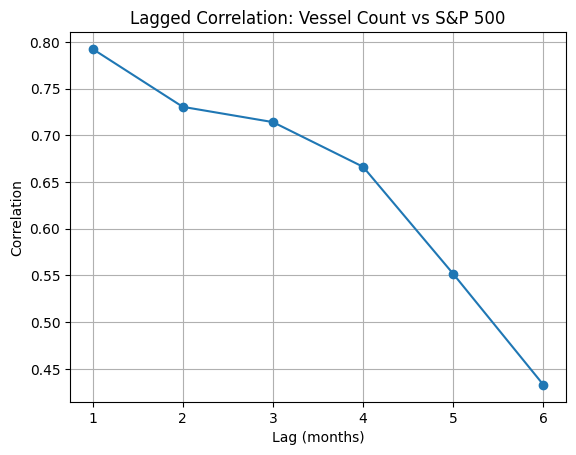

In [69]:
import matplotlib.pyplot as plt

lags = list(range(1, 7))
correlations = [monthly_avg[[f'Vessel_Count_Lag_{lag}', '^GSPC_Close']].corr().iloc[0, 1] for lag in lags]

plt.plot(lags, correlations, marker='o')
plt.title('Lagged Correlation: Vessel Count vs S&P 500')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


<ipython-input-64-8d5c1c493cef>:11: DtypeWarning: Columns (202) have mixed types. Specify dtype option on import or set low_memory=False.
  yahoo_fin_data = pd.read_csv(yfinance_path)


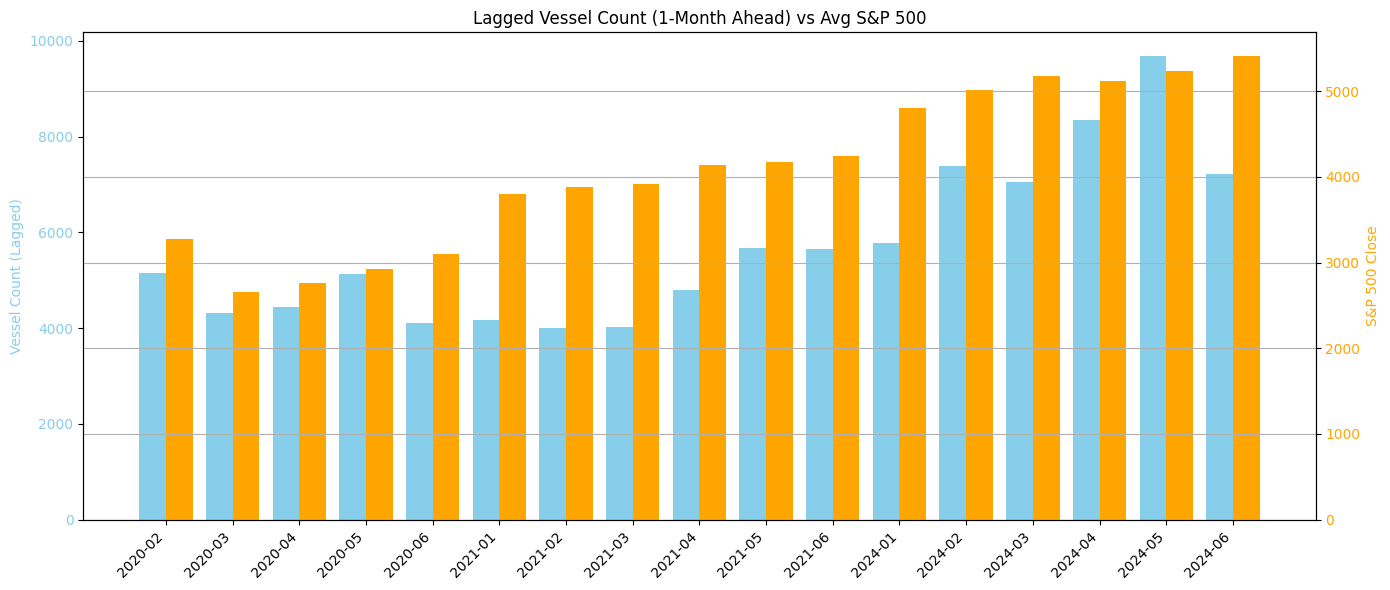

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
vessel_data_path = "/content/drive/My Drive/SIADS_593/assets/merging/ais_port_visits.csv"
yfinance_path = "/content/drive/My Drive/SIADS_593/assets/merging/yfinance_data.csv"

# Read and prepare
vessel_data = pd.read_csv(vessel_data_path)
yahoo_fin_data = pd.read_csv(yfinance_path)

# Convert dates
vessel_data['BaseDateTime'] = pd.to_datetime(vessel_data['BaseDateTime'])
vessel_data['Date'] = vessel_data['BaseDateTime'].dt.date
yahoo_fin_data['Date'] = pd.to_datetime(yahoo_fin_data['Period']).dt.date

# Group vessel counts per day
daily_vessel_counts = vessel_data.groupby('Date').size().reset_index(name='Vessel_Count')

# Select and average S&P data per day
daily_sp500 = yahoo_fin_data[['Date', '^GSPC_Close']].groupby('Date', as_index=False).mean()

# Merge on Date
merged_df = pd.merge(daily_vessel_counts, daily_sp500, on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Add 'Month' column and group
merged_df['Month'] = merged_df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_summary = merged_df.groupby('Month').agg({
    'Vessel_Count': 'sum',
    '^GSPC_Close': 'mean'
}).reset_index()

# Create 1-month lag
monthly_summary['Vessel_Lag1'] = monthly_summary['Vessel_Count'].shift(1)
monthly_lagged = monthly_summary.dropna(subset=['Vessel_Lag1'])

# Plot
bar_width = 0.4
x = np.arange(len(monthly_lagged))

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar 1: Lagged Vessel Count
ax1.bar(x - bar_width/2, monthly_lagged['Vessel_Lag1'], width=bar_width, color='skyblue', label='Lagged Vessel Count')
ax1.set_ylabel('Vessel Count (Lagged)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Bar 2: Avg S&P 500
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, monthly_lagged['^GSPC_Close'], width=bar_width, color='orange', label='Avg S&P 500')
ax2.set_ylabel('S&P 500 Close', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(monthly_lagged['Month'].dt.strftime('%Y-%m'), rotation=45, ha='right')

# Title and layout
plt.title('Lagged Vessel Count (1-Month Ahead) vs Avg S&P 500')
fig.tight_layout()
plt.grid(axis='y')
plt.show()


In [66]:
monthly_lagged.to_csv('/content/drive/My Drive/SIADS_593/assets/merging/monthly_lagged.csv', index=False)


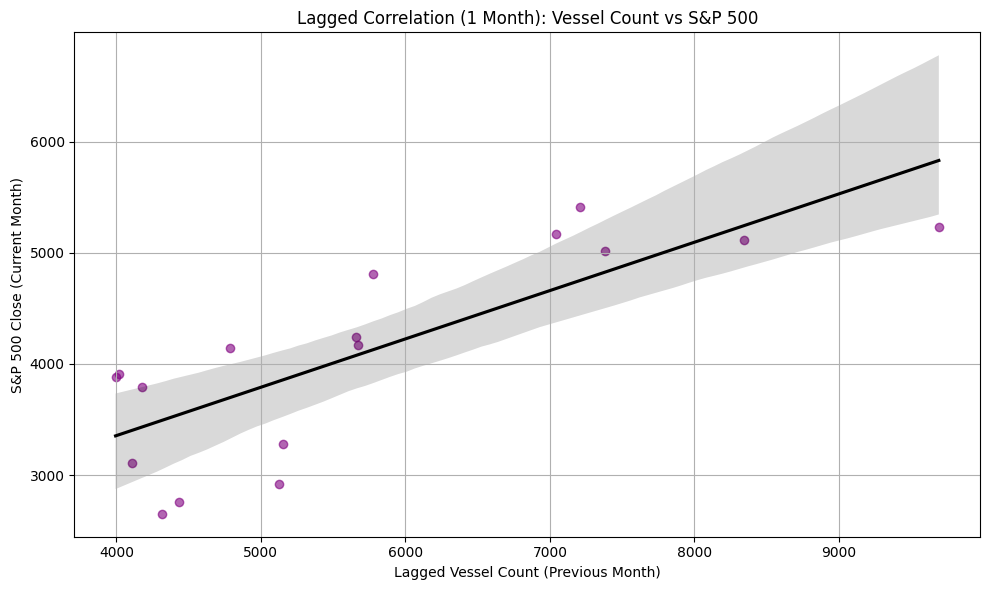

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Make sure Date is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

#Group by month
merged_df['Month'] = merged_df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_avg = merged_df.groupby('Month').agg({
    'Vessel_Count': 'sum',
    '^GSPC_Close': 'mean'
}).reset_index()

# Lag vessel count by 1 month
monthly_avg['Vessel_Lag1'] = monthly_avg['Vessel_Count'].shift(1)

# Drop missing lag row
monthly_lagged = monthly_avg.dropna(subset=['Vessel_Lag1'])

#Plot lagged vessel count vs current S&P 500
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Vessel_Lag1',
    y='^GSPC_Close',
    data=monthly_lagged,
    scatter_kws={'color': 'purple', 'alpha': 0.6},
    line_kws={'color': 'black'},
    ci=95
)

plt.title('Lagged Correlation (1 Month): Vessel Count vs S&P 500')
plt.xlabel('Lagged Vessel Count (Previous Month)')
plt.ylabel('S&P 500 Close (Current Month)')
plt.grid(True)
plt.tight_layout()
plt.show()


Lagged Correlation (1 Month) — Vessel Count vs S&P 500
This plot shows the relationship between:

X-axis: Vessel traffic from the previous month
Y-axis: Average S&P 500 Close in the current month

What the plot tells us:
Positive Correlation
The upward slope of the regression line indicates that higher vessel traffic in one month tends to precede higher S&P 500 levels the next month.

This implies vessel activity could be a leading indicator of economic sentiment or market movement.
Moderate to Strong Relationship

The regression line fits the points with relatively tight confidence bounds, especially in the mid-range of vessel traffic values. This suggests the correlation is statistically meaningful.

Predictive Lag Makes Economic Sense
Increased maritime traffic may signal higher trade volume, manufacturing output, and supply chain movement — all of which could fuel economic optimism reflected in equity markets like the S&P 500. The 1-month lag aligns with that timeline.

Outliers / Noise
A few data points diverge from the trend, which is expected due to market noise, geopolitical shocks, or non-economic S&P 500 drivers (like interest rate policy). Still, the overall pattern holds.

Summary:
- Vessel traffic volume appears to lead S&P 500 movements by about 1 month
- The relationship is positive and visually strong
- Maritime trade could serve as a real-economy proxy for modeling market expectations
Would you like to:

